Lower bound for alpha=0.05: -2.826227742419693
Upper bound for alpha=0.05: 2.64038919936585


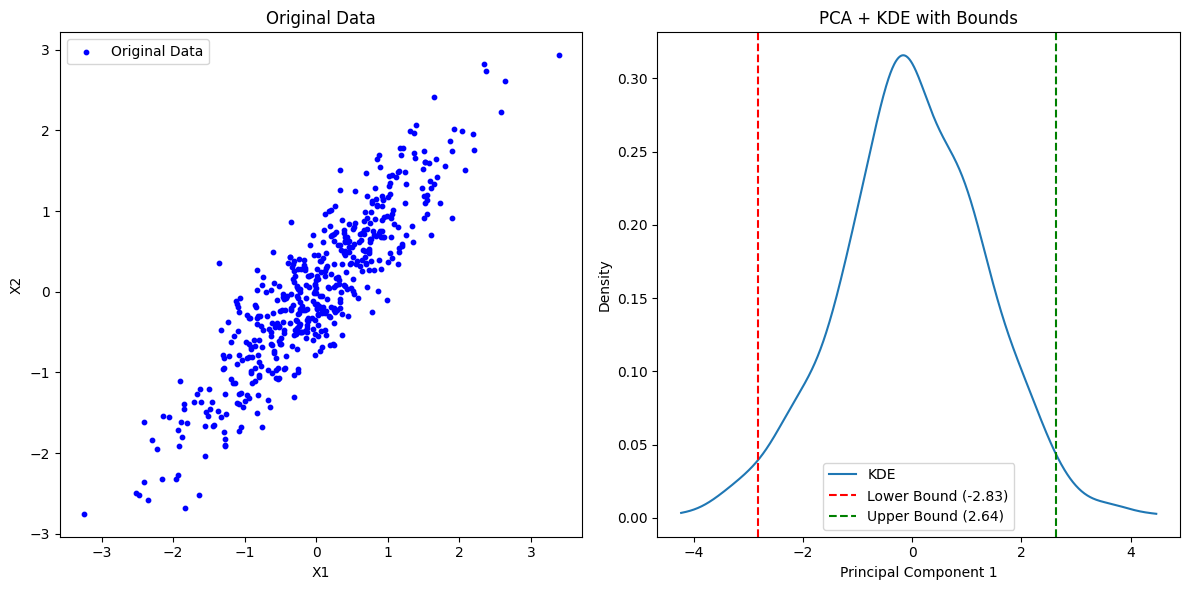

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde, norm
import matplotlib.pyplot as plt

# data
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 500)

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# KDE on the first principal component
kde = gaussian_kde(pca_data[:, 0])
x_grid = np.linspace(min(pca_data[:, 0]), max(pca_data[:, 0]), 1000)
kde_values = kde(x_grid)

# PDF to CDF
cdf = np.cumsum(kde_values)
cdf /= cdf[-1]  # Normalize to make it a proper CDF

# alpha
alpha = 0.05

# lower and upper bounds based on alpha
lower_bound = np.interp(alpha / 2, cdf, x_grid)
upper_bound = np.interp(1 - alpha / 2, cdf, x_grid)

print(f"Lower bound for alpha={alpha}: {lower_bound}")
print(f"Upper bound for alpha={alpha}: {upper_bound}")

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', s=10, label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_grid, kde_values, label='KDE')
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('PCA + KDE with Bounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Lower bound for alpha=0.05: -1.9416306709218778
Upper bound for alpha=0.05: 2.0316466574646155


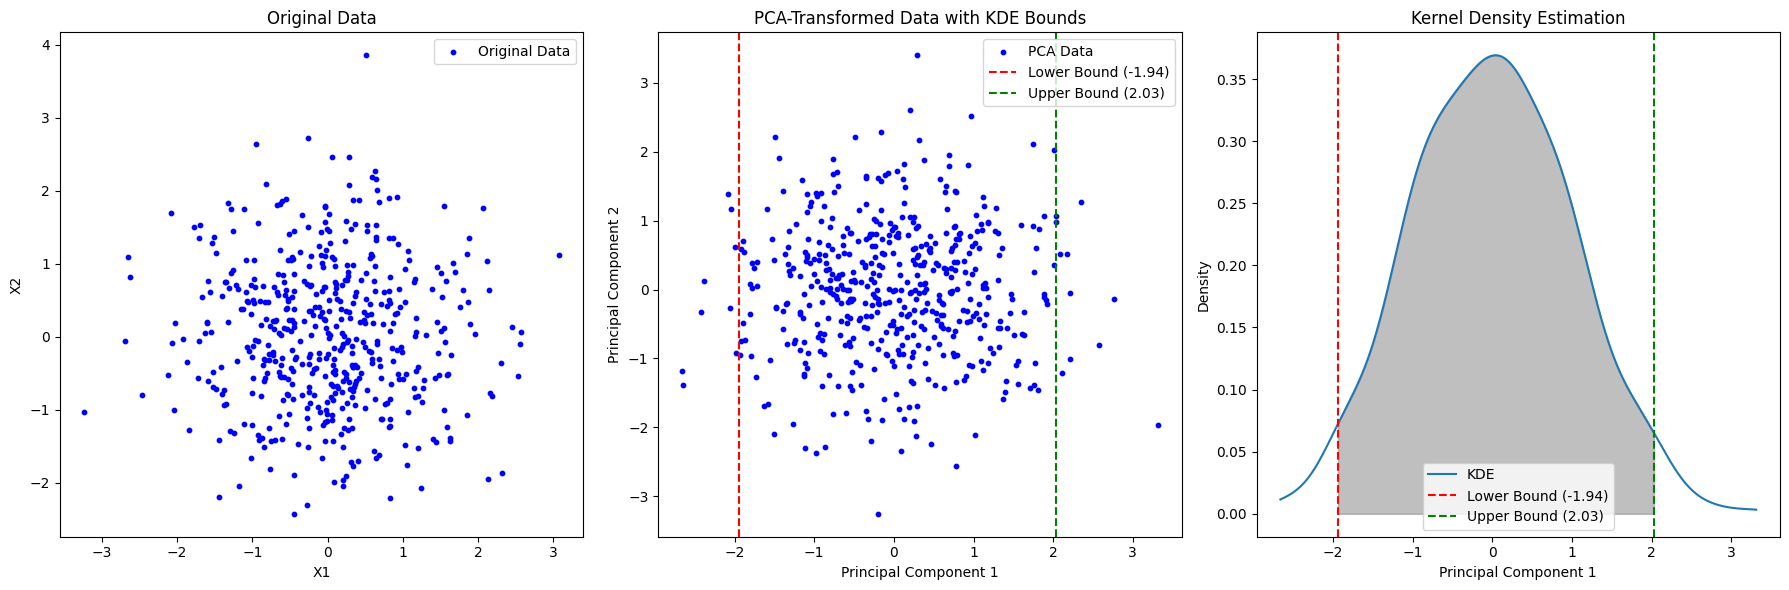

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

np.random.seed(42)

# data
data = np.random.normal(0, 1, (500, 2))

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Perform Kernel Density Estimation (KDE) on the first principal component
kde = gaussian_kde(pca_data[:, 0])
x_grid = np.linspace(min(pca_data[:, 0]), max(pca_data[:, 0]), 1000)
kde_values = kde(x_grid)

# Convert PDF to CDF
cdf = np.cumsum(kde_values)
cdf /= cdf[-1]  # Normalize to make it a proper CDF

# alpha
alpha = 0.05

# lower and upper bounds based on alpha
lower_bound = np.interp(alpha / 2, cdf, x_grid)
upper_bound = np.interp(1 - alpha / 2, cdf, x_grid)

print(f"Lower bound for alpha={alpha}: {lower_bound}")
print(f"Upper bound for alpha={alpha}: {upper_bound}")

# Plot the original data, PCA results, and KDE
plt.figure(figsize=(18, 6))

# data plot
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', s=10, label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# projection plot
plt.subplot(1, 3, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', s=10, label='PCA Data')
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('PCA-Transformed Data with KDE Bounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# kde plot
plt.subplot(1, 3, 3)
plt.plot(x_grid, kde_values, label='KDE')
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.fill_between(x_grid, 0, kde_values, where=((x_grid >= lower_bound) & (x_grid <= upper_bound)), color='gray', alpha=0.5)
plt.title('Kernel Density Estimation')
plt.xlabel('Principal Component 1')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()